In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [45]:
%reload_ext autoreload
%autoreload 2
import ACPF

# Utilisation de Processus Gaussien pour prédire une sortie scalaire à partir de données d'entrées fonctionnelles v2

On importe notre plan d'expérience créé au préalable dans le notebook **Doe Functionnal**

In [46]:
T=36                  # On regarde toutes les 10 minutes pendant 6 heures, ca nous fait donc 36 points
t=np.linspace(0,6,T)
dt = t[1] - t[0] 

best_plan_values = np.load("./data/best_plan_values.npy")
print(best_plan_values.shape)

(200, 8, 36)


In [47]:
def Campbell(x,z1,z2):
  return x[0]*np.exp(-(0.8*z1+0.2*z2-10*x[1])**2/(60*x[0]**2))+(x[1]+x[3])*np.exp((0.5*z1+0.5*z2)*x[0]/500)+x[4]*(x[2]-2)*np.exp(-(0.4*z1+0.6*z2-20*x[5])**2/(40*x[4]**2))+(x[5]+x[7])*np.exp((0.3*z1+0.7*z2)*x[6]/250)

On discrétise le domaine spatial.

In [48]:
n_grid = 64
D = n_grid**2
z1_vals=np.linspace(-90,90,n_grid)
z2_vals=np.linspace(-90,90,n_grid)

Z1,Z2=np.meshgrid(z1_vals,z2_vals)

On calcul à chaque pixel la hauteur d'eau moyenne, max et min pour une entrée: 

In [49]:
def HE_moyenne(e, z1, z2):
    s = 0
    for i in range(e.shape[1]):
        s+=Campbell(e[:, i], z1, z2) * dt
    return s/e.shape[1]

def HE_max(e, Z1, Z2):
    M = np.zeros_like(Z1)
    for i in range(Z1.shape[0]):       
        for j in range(Z1.shape[1]):  
            vals = [Campbell(e[:, k], Z1[i,j], Z2[i,j])*dt for k in range(e.shape[1])]
            M[i,j] = np.max(vals)
    return M

def HE_min(e, Z1, Z2):
    M = np.zeros_like(Z1)

    for i in range(Z1.shape[0]): 
        for j in range(Z1.shape[1]):
            vals = [Campbell(e[:, k], Z1[i,j], Z2[i,j])*dt for k in range(e.shape[1])]
            M[i,j] = np.min(vals)
    return M


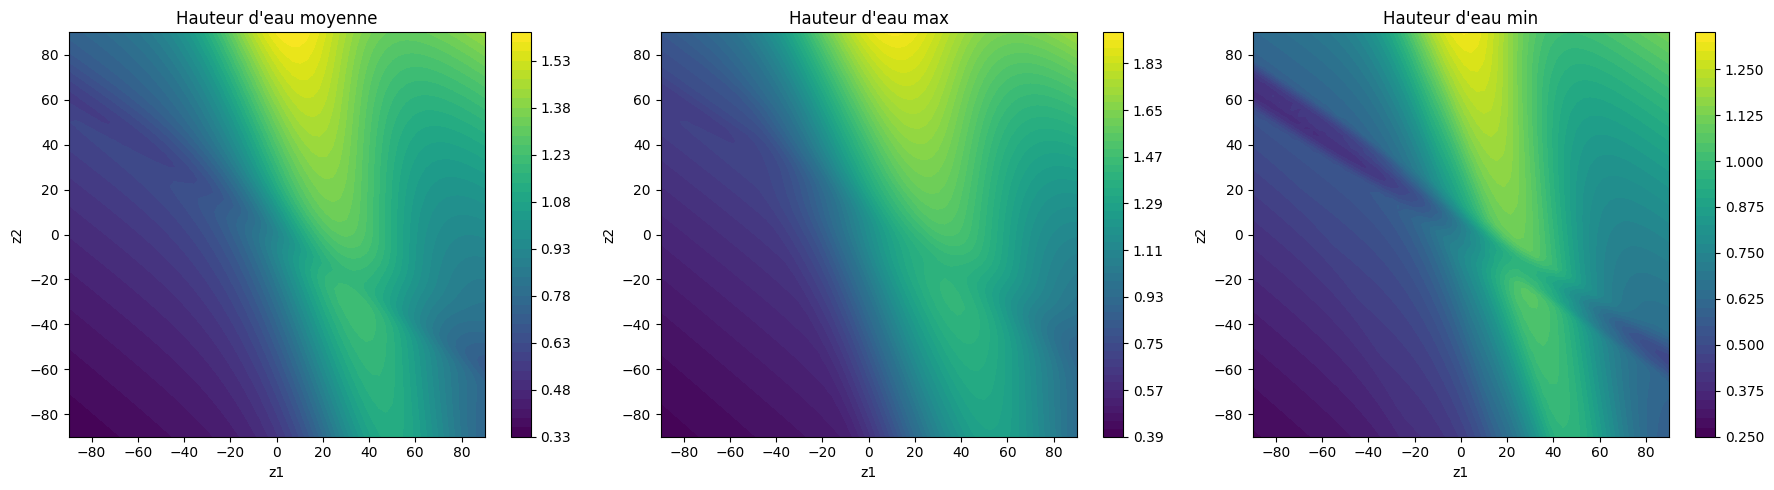

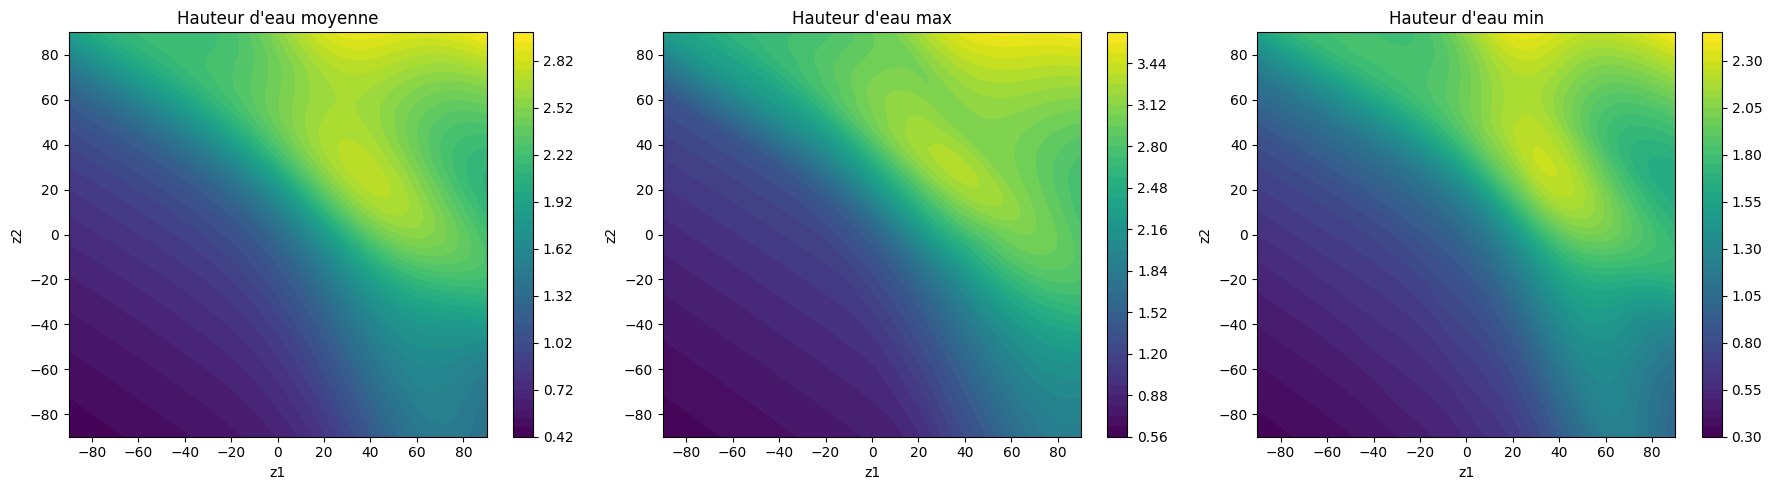

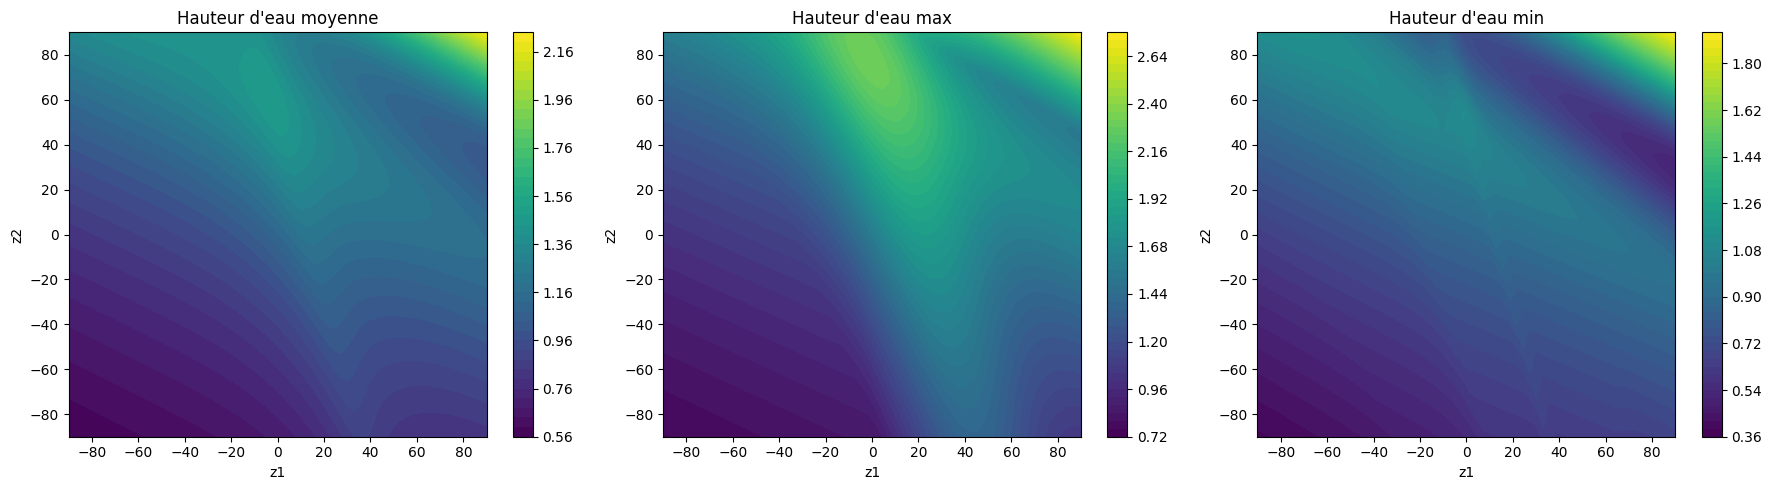

In [52]:
for i in range(3):
    e=best_plan_values[i]
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # moyenne
    im0 = axes[0].contourf(Z1, Z2, HE_moyenne(e, Z1, Z2), levels=50, cmap='viridis')
    fig.colorbar(im0, ax=axes[0])
    axes[0].set_title("Hauteur d'eau moyenne")
    axes[0].set_xlabel("z1")
    axes[0].set_ylabel("z2")

    # max
    im1 = axes[1].contourf(Z1, Z2, HE_max(e, Z1, Z2), levels=50, cmap='viridis')
    fig.colorbar(im1, ax=axes[1])
    axes[1].set_title("Hauteur d'eau max")
    axes[1].set_xlabel("z1")
    axes[1].set_ylabel("z2")

    # min
    im2 = axes[2].contourf(Z1, Z2, HE_min(e, Z1, Z2), levels=50, cmap='viridis')
    fig.colorbar(im2, ax=axes[2])
    axes[2].set_title("Hauteur d'eau min")
    axes[2].set_xlabel("z1")
    axes[2].set_ylabel("z2")

    plt.tight_layout()
    plt.show()